# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
print(url + "&q=tooele")

http://api.openweathermap.org/data/2.5/weather?units=metric&appid=623021c77869cdb49a887dcf2438cd4d&q=tooele


In [6]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | richards bay
Processing Record 4 of Set 1 | wailua homesteads
Processing Record 5 of Set 1 | quellon
Processing Record 6 of Set 1 | whitehorse
Processing Record 7 of Set 1 | ust-nera
Processing Record 8 of Set 1 | saint-pierre
Processing Record 9 of Set 1 | ghat
Processing Record 10 of Set 1 | bereket
Processing Record 11 of Set 1 | caleta de carquin
Processing Record 12 of Set 1 | olyokminsk
Processing Record 13 of Set 1 | vorkuta
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | chinchilla
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | jaicos
Processing Record 20 of Set 1 | moama
Processing Record 21 of Set 1 | egilsstadir
Processing Record 22 of Set 1 | fene
Processing Reco

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,10.16,81,0,5.66,ZA,1721534654
1,ushuaia,-54.8000,-68.3000,2.81,75,75,11.32,AR,1721534655
2,richards bay,-28.7830,32.0377,15.30,88,32,1.71,ZA,1721534656
3,wailua homesteads,22.0669,-159.3780,26.44,76,75,4.63,US,1721534390
4,quellon,-43.1167,-73.6167,6.66,90,89,0.27,CL,1721534117


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,10.16,81,0,5.66,ZA,1721534654
1,ushuaia,-54.8000,-68.3000,2.81,75,75,11.32,AR,1721534655
2,richards bay,-28.7830,32.0377,15.30,88,32,1.71,ZA,1721534656
3,wailua homesteads,22.0669,-159.3780,26.44,76,75,4.63,US,1721534390
4,quellon,-43.1167,-73.6167,6.66,90,89,0.27,CL,1721534117


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

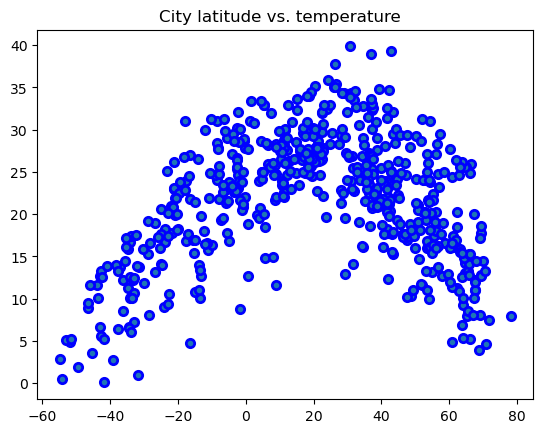

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor = "blue",
    linewidths = 2,
    marker = "o",
    alpha = 1,
    label = "Cities"
)

# Incorporate the other graph properties
plt.title("City latitude vs. temperature  ")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

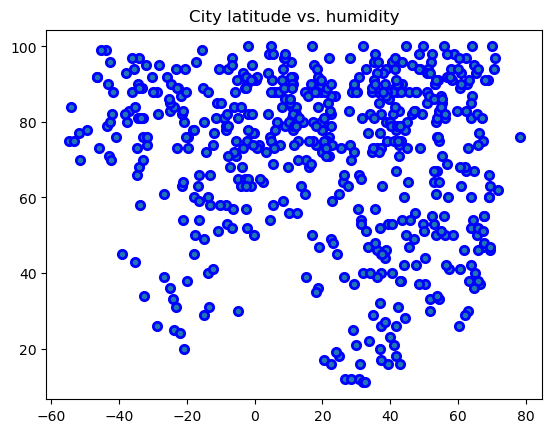

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor = "blue",
    linewidths = 2,
    marker = "o",
    alpha = 1,
    label = "Cities"
)

# Incorporate the other graph properties
plt.title("City latitude vs. humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

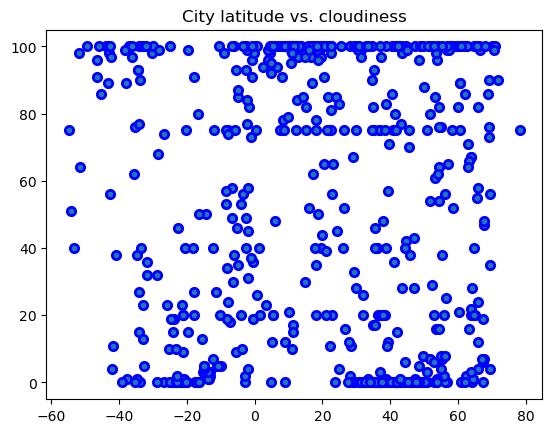

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor = "blue",
    linewidths = 2,
    marker = "o",
    alpha = 1,
    label = "Cities"
)

# Incorporate the other graph properties
plt.title("City latitude vs. cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

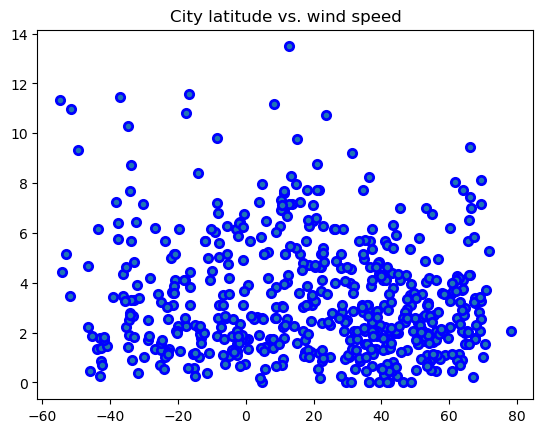

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor = "blue",
    linewidths = 2,
    marker = "o",
    alpha = 1,
    label = "Cities"
)

# Incorporate the other graph properties
plt.title("City latitude vs. wind speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(X_values, y_values, title, text_coord):
    (slope, intercept, rvalues, pvaules, stderr) = linregress(x_values, y_values)
    regress_values = slope * x_values + intercept
    line_eq= f"y = {round(slope,2)}x + {round(intercept,20)}"

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coord, fontsize = 15, color = "red")
    plt.xlabel("Lat")
    plt.ylabel(title)
    print(f"The r-value is {rvalues **2}")
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,wailua homesteads,22.0669,-159.3780,26.44,76,75,4.63,US,1721534390
5,whitehorse,60.7161,-135.0538,24.43,41,75,3.60,CA,1721534461
6,ust-nera,64.5667,143.2000,13.08,95,100,1.98,RU,1721534661
8,ghat,24.9647,10.1728,28.33,18,4,1.02,LY,1721534663
9,bereket,39.2446,55.5154,34.81,16,12,4.37,TM,1721534664


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,10.16,81,0,5.66,ZA,1721534654
1,ushuaia,-54.8000,-68.3000,2.81,75,75,11.32,AR,1721534655
2,richards bay,-28.7830,32.0377,15.30,88,32,1.71,ZA,1721534656
4,quellon,-43.1167,-73.6167,6.66,90,89,0.27,CL,1721534117
7,saint-pierre,-21.3393,55.4781,20.32,63,0,3.60,RE,1721534662


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.3274505851559175


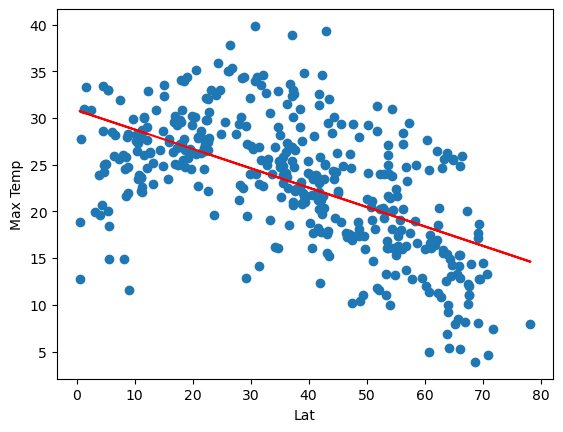

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6, -10))


The r-value is 0.6070057602365017


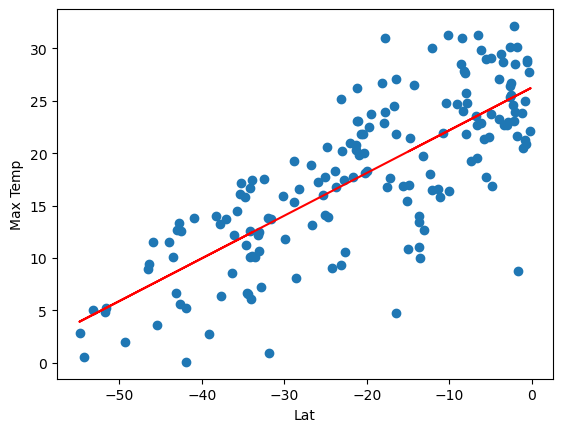

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6, -10))

**Discussion about the linear relationship:** Looking at these lines temprature closer to the 0 point of the hemisphere are the highest with most of it being more on the nothern hemisphere side

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.015217017272895258


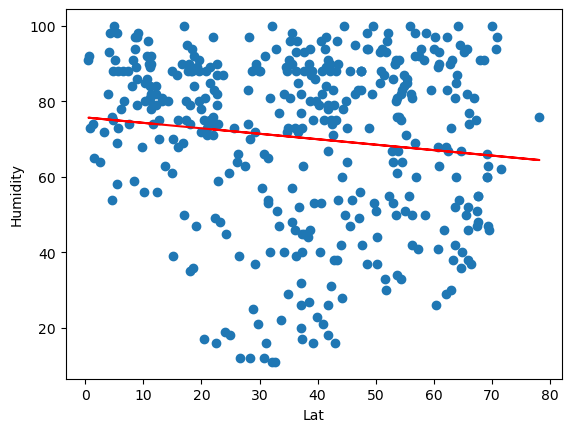

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(6, -10))

The r-value is 0.01014796012986021


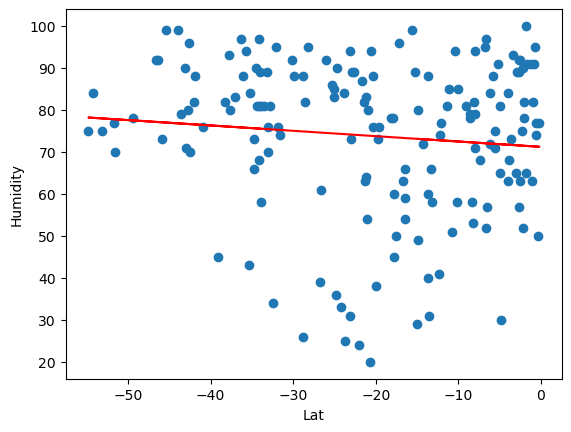

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(6, -10))

**Discussion about the linear relationship:** the humidity for both hemisphere relitivly stay the same with a small increase further away from the hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.042605293901471386


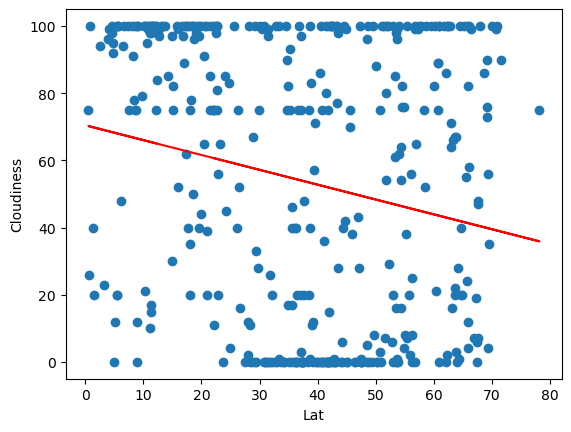

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(6, -10))

The r-value is 0.014133110373120579


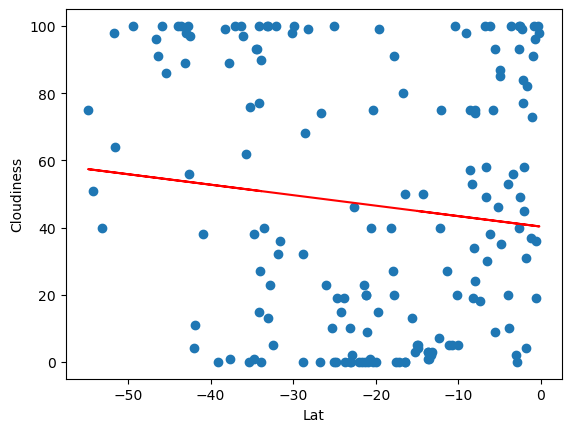

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(6, -10))

**Discussion about the linear relationship:** the northern and southern hemiphere cloudiness are complete opposite in this one while in the northern there are less clouds further away from the zero point. while in the southern hemisphere there are more clouds further away from the zero point

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.031882194003251894


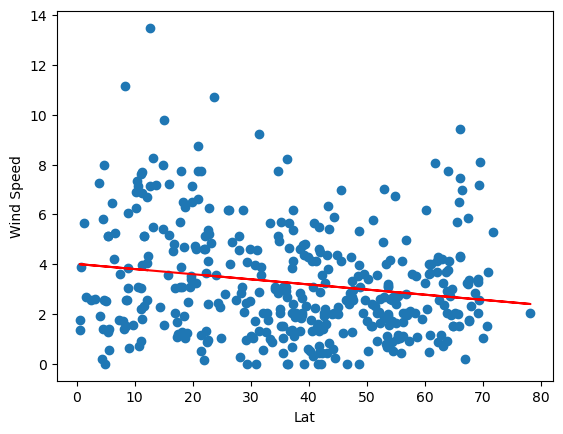

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(6, -10))

The r-value is 0.018327335533125332


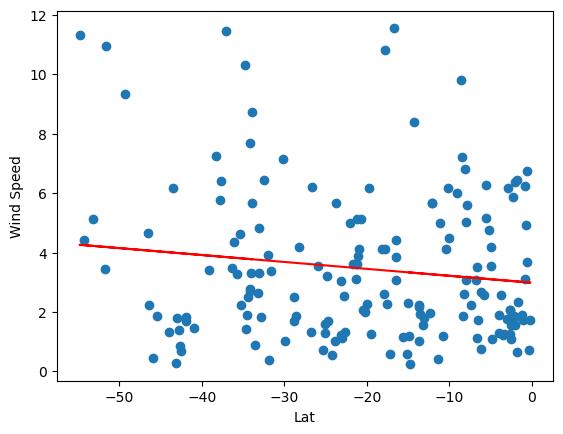

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(6, -10))

**Discussion about the linear relationship:** in the northern hemisphere the are lower the further away from the zero point. while in the southern hemisphere the wind speeds are higher the further away from the zero point